In [ ]:

#tensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels), (test_images, test_lables) = fashion_mnist.load_data()
class_names = ['T-shirt','Trosuer','pullover', ' Dress', 'Coat',
               'Sandal', ' shirt', 'Sneakers', 'Bag', ' Ankle_boot']
train_iamges = train_images /255.0
test_images = test_images  /255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer(1)
    keras.layers.Dense(128, activation='relu'), #hidden layer(2)
    keras.layers.Dense(10, activation='softmax') #output layer(3)
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6530 - loss: 9.5751
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7237 - loss: 0.7143
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7855 - loss: 0.6000
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8102 - loss: 0.5461
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8122 - loss: 0.5356
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8209 - loss: 0.5182
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8270 - loss: 0.5023
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8244 - loss: 0.5170
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8306 - loss: 0.4873
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8341 - loss: 0.4798


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print('\nTest accuracy:', test_acc)
#

313/313 - 0s - 2ms/step - accuracy: 0.1011 - loss: 2.8872

Test accuracy: 0.10109999775886536


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
T-shirt


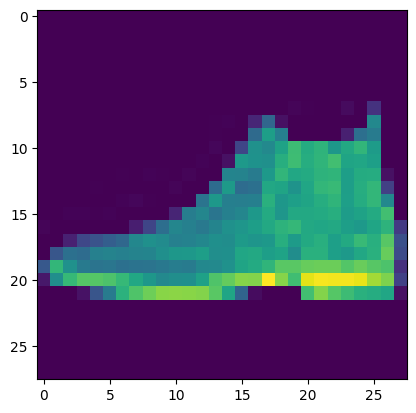

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[9])])
plt.figure()
plt.imshow(test_images[0])
plt.grid(False)
plt.show()

In [ ]:
test_images.shape

(10000, 28, 28)

Pick a number: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


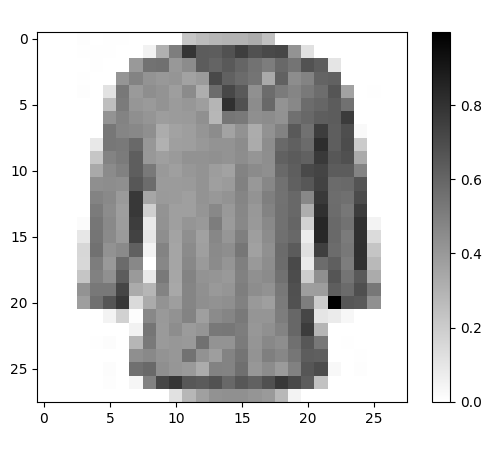

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt','Trosuer','pullover', ' Dress', 'Coat',
               'Sandal', ' shirt', 'Sneakers', 'Bag', ' Ankle_boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel("Excpected: " + label)
  plt.title("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number(): # This function should be outside show_image
    while True:
      num = input("Pick a number: ")
      if num.isdigit():
        num = int(num)
        if 0 <= num <= 1000:
          return int(num)
      else:
        print("Try again...")

num = get_number() # These lines should be outside show_image
image = test_images[num]
label = test_lables[num]
predict(model, image, label)